In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import re
import json

import nltk
from nltk.stem import WordNetLemmatizer
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

from tqdm import tqdm

from wordcloud import WordCloud

In [3]:
from transformers import pipeline

In [4]:
import spacy

# Load nlp model
nlp = spacy.load('en_core_web_sm')

# Load Data

In [5]:
with open("meta-data_phone.json", "r") as file:
    data = json.load(file)

data

{'1': {'review_id': 1,
  'review_time': '2019-08-02',
  'review': 'Pixel 3 has frequent display defects.I like this phone model. I bought this phone as a gift to my wife. Unfortunately, the phone turned out to be defective. There is a pink tint on the screen. Amazon does not want to properly help customers who are not in the USA. This is very sad.',
  'rating': 3,
  'helpfulVotes': 20.0,
  'review_processed': 'There is a pink tint on the screen. Amazon does not want to properly help customers who are not in the U.S. This is very sad. I like this phone model, but it has frequent display defects. I bought it as a gift for my wife, but the phone is defective.',
  'aspect_sentiment': [{'term': 'display',
    'class': 'negative',
    'probability': [0.9978808760643005,
     0.0004631515475921333,
     0.0016559597570449114],
    'context': ['I like this phone model, but it has frequent display defects.']},
   {'term': 'screen',
    'class': 'negative',
    'probability': [0.9974362254142761

In [6]:
df = pd.DataFrame.from_dict(data, orient='index')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 1 to 86
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         79 non-null     int64  
 1   review_time       79 non-null     object 
 2   review            79 non-null     object 
 3   rating            79 non-null     int64  
 4   helpfulVotes      79 non-null     float64
 5   review_processed  79 non-null     object 
 6   aspect_sentiment  79 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.9+ KB
None


,review_id,review_time,review,rating,helpfulVotes,review_processed,aspect_sentiment
1,1,2019-08-02,Pixel 3 has frequent display defects.I like th...,3,20.0,There is a pink tint on the screen. Amazon doe...,"[{'term': 'display', 'class': 'negative', 'pro..."
2,2,2018-04-30,the lower left corner of the phone doesnt work...,2,1.0,The lower left corner of the phone doesn't wor...,"[{'term': 'styluses', 'class': 'negative', 'pr..."
3,3,2017-01-16,"Great phone, be careful with the sellers.The p...",3,10.0,"The phone is wonderful, if you're considering ...","[{'term': 'lock button', 'class': 'negative', ..."
4,4,2019-06-22,U had no issue with the seller they were great...,1,3.0,I was very disappointed in the way this phone ...,"[{'term': 'seller', 'class': 'positive', 'prob..."
5,6,2019-08-12,Good phone!.I personally think this phone is n...,5,1.0,I have used this phone for a while now and it'...,"[{'term': 'screen', 'class': 'negative', 'prob..."


# Aspect Classification

In [8]:
aspects = {}
text = ""
for items in df['aspect_sentiment'].values:
    for item in items:
        term = item.get('term')
        text = text + term + " " 
        if len(term) < 2:
            continue
        if term not in aspects.keys():
            aspects[term] = 1
        else:
            aspects[term] = aspects[term] + 1
aspects

{'display': 1,
 'screen': 6,
 'styluses': 1,
 'lock button': 1,
 'scuf': 1,
 'seller': 2,
 'price tag': 1,
 'service': 2,
 'finger scanner': 1,
 'security': 1,
 'edges': 1,
 'reception': 2,
 'finish': 1,
 'glass': 1,
 'back': 1,
 'front': 1,
 'use': 3,
 'apps': 2,
 'value': 3,
 'phone': 7,
 'price': 4,
 'battery': 5,
 'iphone': 8,
 'charging': 1,
 'samsung': 5,
 'bloatware': 2,
 'amazon': 2,
 'wifi': 4,
 'customer service': 1,
 'sim card card': 1,
 'sim card': 3,
 'camper': 1,
 'google': 2,
 'stars': 5,
 'features': 4,
 'lt': 1,
 'camera': 5,
 'android': 2,
 'external battery': 1,
 'charge': 1,
 'extra battery': 1,
 'moto': 1,
 'costs': 1,
 'note 7': 1,
 'edge': 1,
 'size': 1,
 'kpop': 1,
 '- quality': 1,
 'build': 1,
 'physical design': 1,
 'processor': 1,
 'android 8': 1,
 '1080p display': 1,
 'snapdragon 835': 1,
 'condition': 1,
 'sound': 1,
 'usb cable': 1,
 'internet speed': 1,
 'app': 2,
 'the': 1,
 'unlock': 1,
 'battery life': 1,
 'durability': 1,
 'sim': 2,
 'dual': 1,
 'spec

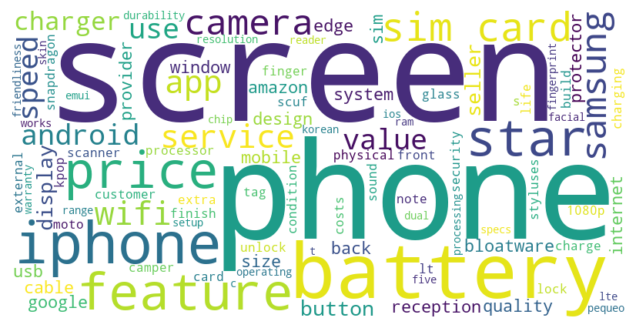

In [10]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
class_aspects = {
    'Hardware Features and Design': [
        'display', 'screen', 'styluses', 'lock button', 'edges', 
        'finish', 'glass', 'back', 'front', 'fingerprint reader', 
        'camera', 'screen protector', 'usb cable', 'usb c cable', 
        'battery', 'charging', 'external battery', 'extra battery', 
        'resolution of the screen', 'dual', 'sim card', 'sim card card', 
        'mobile sim card', 'battery life', 'build', 'physical design', 'quality'
    ],
    
    'Software and Operating Systems': [
        'apps', 'bloatware', 'android', 'google', 'ios', 
        'operating system', 'emui skin', 'features', 'feature', 'app'
    ],
    
    'Performance and Speed': [
        'speed', 'processor', 'ram', 'internet speed', 'snapdragon 835', 
        'lte systems', 'performance'
    ],
    
    'Pricing and Value': [
        'price tag', 'price', 'value', 'costs', 'price range'
    ],
    
    'Connectivity and Network': [
        'wifi', 'reception', 'sim', 'internet', 'sim cards', 
        'network', 'service provider', 'mobile', 'service'
    ],
    
    'Customer Service and Experience': [
        'seller', 'customer service', 'amazon', 'warranty', 'provider'
    ],
    
    'Brand and Model Specifics': [
        'iphone', 'samsung', 'moto', 'note 7', 'kpop', 'google'
    ],

    'Design and Aesthetics': [
        'design', 'size', 'edges', 'finish', 'back button', 'physical design', 
        'build', 'appearance', 'color', 'look'
    ]
}

# Else: Miscellaneous

In [13]:
def get_key(dictionary, value):
    for k, v in dictionary.items():
        if value in v:
            return k
    return 'Miscellaneous'

def generate_topics(dictionary):
    return list(dictionary.keys()) + ['Miscellaneous']

# Table Main

In [14]:
df.head()

,review_id,review_time,review,rating,helpfulVotes,review_processed,aspect_sentiment
1,1,2019-08-02,Pixel 3 has frequent display defects.I like th...,3,20.0,There is a pink tint on the screen. Amazon doe...,"[{'term': 'display', 'class': 'negative', 'pro..."
2,2,2018-04-30,the lower left corner of the phone doesnt work...,2,1.0,The lower left corner of the phone doesn't wor...,"[{'term': 'styluses', 'class': 'negative', 'pr..."
3,3,2017-01-16,"Great phone, be careful with the sellers.The p...",3,10.0,"The phone is wonderful, if you're considering ...","[{'term': 'lock button', 'class': 'negative', ..."
4,4,2019-06-22,U had no issue with the seller they were great...,1,3.0,I was very disappointed in the way this phone ...,"[{'term': 'seller', 'class': 'positive', 'prob..."
5,6,2019-08-12,Good phone!.I personally think this phone is n...,5,1.0,I have used this phone for a while now and it'...,"[{'term': 'screen', 'class': 'negative', 'prob..."


In [15]:
topic_json = {k: 0 for k in list(class_aspects.keys()) + ["Miscellaneous"]}
topic_json

{'Hardware Features and Design': 0,
 'Software and Operating Systems': 0,
 'Performance and Speed': 0,
 'Pricing and Value': 0,
 'Connectivity and Network': 0,
 'Customer Service and Experience': 0,
 'Brand and Model Specifics': 0,
 'Design and Aesthetics': 0,
 'Miscellaneous': 0}

**Topic Classification**

In [16]:
# Topic records

records = []
for _, row in df.iterrows():
    record = {'review_id': row['review_id']}
    items = row['aspect_sentiment']
    record.update(topic_json.copy())
    for item in items:
        term = item['term']
        topic = get_key(class_aspects, term)
        record[topic] = 1
    records.append(record)

records

[{'review_id': 1,
  'Hardware Features and Design': 1,
  'Software and Operating Systems': 0,
  'Performance and Speed': 0,
  'Pricing and Value': 0,
  'Connectivity and Network': 0,
  'Customer Service and Experience': 0,
  'Brand and Model Specifics': 0,
  'Design and Aesthetics': 0,
  'Miscellaneous': 0},
 {'review_id': 2,
  'Hardware Features and Design': 1,
  'Software and Operating Systems': 0,
  'Performance and Speed': 0,
  'Pricing and Value': 0,
  'Connectivity and Network': 0,
  'Customer Service and Experience': 0,
  'Brand and Model Specifics': 0,
  'Design and Aesthetics': 0,
  'Miscellaneous': 0},
 {'review_id': 3,
  'Hardware Features and Design': 1,
  'Software and Operating Systems': 0,
  'Performance and Speed': 0,
  'Pricing and Value': 0,
  'Connectivity and Network': 0,
  'Customer Service and Experience': 0,
  'Brand and Model Specifics': 0,
  'Design and Aesthetics': 0,
  'Miscellaneous': 1},
 {'review_id': 4,
  'Hardware Features and Design': 0,
  'Software and

**Save Table per Topic**

In [17]:
topic_df = pd.DataFrame.from_dict(records)

topic_df.head()

,review_id,Hardware Features and Design,Software and Operating Systems,Performance and Speed,Pricing and Value,Connectivity and Network,Customer Service and Experience,Brand and Model Specifics,Design and Aesthetics,Miscellaneous
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,1
3,4,0,0,0,1,1,1,0,0,0
4,6,1,0,0,0,0,0,0,0,1


In [85]:
def formatting_aspect(items):
    format = ""
    for i, item in enumerate(items):
        term = item.get('term')
        sentiment = item.get('class')
        format += f"● {term}: {sentiment}"
        if i != len(items) - 1:
            format += "\n"
    return format

def generate_table(df: pd.DataFrame, topic_df: pd.DataFrame, topic: str):
    columns = ["review_id", "review_time", "rating", "review", "aspect_sentiment", "topic"]
    drop = ['review_processed']
    mask = topic_df[topic_df[topic] == 1]['review_id'].values
    result = df[df['review_id'].isin(mask)].copy()
    result['aspect_sentiment'] = result['aspect_sentiment'].apply(formatting_aspect)
    result['topic'] = [topic] * result.shape[0]
    result = result[columns].sort_values(by='review_time').reset_index(drop=True)

    return result

In [89]:
topics = generate_topics(class_aspects)

frames = []
for topic in topics:
    temp = generate_table(df, topic_df, topic)
    frames.append(temp)
    # Save to excel
    # temp.to_excel(f"table/main_phone_{topic}.xlsx", index=False)

In [88]:
df_main = pd.concat(frames)

df_main.head()

,review_id,review_time,rating,review,aspect_sentiment,topic
0,19,2013-12-19,1,"Broke after one month.Piece of crap. worked for about a month then it quit 'ringing' ( or making any kind of noise at all) and YES we checked to see if it was on silent or turned down. also will just randomly cut me off and start blinking weird stuff on the screen, going 'in and out' (no its not the server, def the phone). Says the battery is fully charged and then 20 minutes later shows battery as drained. DO NOT WASTE YOUR MONEY ON THIS PHONE!",● battery: negative,Hardware Features and Design
1,94,2014-09-21,1,Not happy that it was falsely advertised and window 7.This phone does not have window 8 as advertised. Not happy that it was falsely advertised and window 7.8 does not support what I need it to. I would not buy from this supplier.,● quality: negative\n● window 8: negative\n● window 7 . 8: negative,Hardware Features and Design
2,30,2016-08-21,2,"Mediocre at best. Design is not very attractive not innovative.Mediocre at best. Design is not very attractive not innovative. The one and only reason to buy this phone is for the camera which is exceptional. Yes, it'd fast but there are plenty of other high end phones that blown this out of the water including the OnePlus Three that can basically be had for 3/4 the price. I reverted back to my Nexus 6P. That said, I've heard better things about the S7 edge and Note 7 but the note costs abou...",● costs: neutral\n● note 7: positive\n● edge: positive\n● s: positive\n● size: positive\n● camera: positive\n● bloatware: positive,Hardware Features and Design
3,91,2016-10-06,2,"I got a bad phone, they don't have inventory so I have ....The phone doesn't work with T-Mobile SIM card, contacted Sony officials and they told me they do not know which carrier is compatible with Xperia and asked me to contact the seller. According the Amazon representatives, I got a bad phone, they don't have inventory so I have to get a refund. I don't know if I'm the only one experiencing this issue, but it's very annoying. Extra star for good looking",● mobile sim card: negative\n● t: negative,Hardware Features and Design
4,12,2016-10-20,1,Mobile not working.I am not able switch on my mobile since today morning. The last used yesterday night and when I woke up in morning I found my mobile was totally dead even not charging also. Kindly help me to find the solution.,● charging: negative,Hardware Features and Design


# Table Aspects

In [23]:
df.head()

,review_id,review_time,review,rating,helpfulVotes,review_processed,aspect_sentiment
1,1,2019-08-02,Pixel 3 has frequent display defects.I like th...,3,20.0,There is a pink tint on the screen. Amazon doe...,"[{'term': 'display', 'class': 'negative', 'pro..."
2,2,2018-04-30,the lower left corner of the phone doesnt work...,2,1.0,The lower left corner of the phone doesn't wor...,"[{'term': 'styluses', 'class': 'negative', 'pr..."
3,3,2017-01-16,"Great phone, be careful with the sellers.The p...",3,10.0,"The phone is wonderful, if you're considering ...","[{'term': 'lock button', 'class': 'negative', ..."
4,4,2019-06-22,U had no issue with the seller they were great...,1,3.0,I was very disappointed in the way this phone ...,"[{'term': 'seller', 'class': 'positive', 'prob..."
5,6,2019-08-12,Good phone!.I personally think this phone is n...,5,1.0,I have used this phone for a while now and it'...,"[{'term': 'screen', 'class': 'negative', 'prob..."


In [27]:
def recording_aspect(row):
    records = []
    id_ = row['review_id']
    date_ = row['review_time']
    items = row['aspect_sentiment']
    rating = row['rating']
    
    for item in items:
        aspect = item.get('term')
        aspect = nlp(aspect)[0:].lemma_
        sentiment = item.get('class')
        topic = get_key(class_aspects, aspect)
        records.append({'review_id': id_, 'review_time': date_, 'aspect':aspect, 'sentiment': sentiment, 'topic': topic, 'rating': rating})
    return records

In [28]:
records = []

for _, row in df.iterrows():
    records += recording_aspect(row)

records

[{'review_id': 1,
  'review_time': '2019-08-02',
  'aspect': 'display',
  'sentiment': 'negative',
  'topic': 'Hardware Features and Design',
  'rating': 3},
 {'review_id': 1,
  'review_time': '2019-08-02',
  'aspect': 'screen',
  'sentiment': 'negative',
  'topic': 'Hardware Features and Design',
  'rating': 3},
 {'review_id': 2,
  'review_time': '2018-04-30',
  'aspect': 'stylus',
  'sentiment': 'negative',
  'topic': 'Miscellaneous',
  'rating': 2},
 {'review_id': 3,
  'review_time': '2017-01-16',
  'aspect': 'lock button',
  'sentiment': 'negative',
  'topic': 'Hardware Features and Design',
  'rating': 3},
 {'review_id': 3,
  'review_time': '2017-01-16',
  'aspect': 'scuf',
  'sentiment': 'positive',
  'topic': 'Miscellaneous',
  'rating': 3},
 {'review_id': 4,
  'review_time': '2019-06-22',
  'aspect': 'seller',
  'sentiment': 'positive',
  'topic': 'Customer Service and Experience',
  'rating': 1},
 {'review_id': 4,
  'review_time': '2019-06-22',
  'aspect': 'price tag',
  'sent

In [30]:
df_record = pd.DataFrame.from_dict(records)

# Create pivot table
df_aspect = (
    df_record.groupby(["topic", "review_time", "aspect", "sentiment"])['review_time']
    .count()
    .unstack("sentiment", fill_value=0)
    .sort_values(by='review_time')
).reset_index()

df_aspect['total'] = df_aspect['negative'] + df_aspect['positive'] + df_aspect['neutral']
df_aspect = df_aspect.rename_axis(index=None, columns=None)

df_aspect.head()

,topic,review_time,aspect,negative,neutral,positive,total
0,Miscellaneous,2013-04-18,phone,0,0,1,1
1,Miscellaneous,2013-04-18,I,0,0,1,1
2,Software and Operating Systems,2013-12-08,feature,0,2,0,2
3,Software and Operating Systems,2013-12-08,app,0,0,1,1
4,Software and Operating Systems,2013-12-08,android,0,0,1,1


**Save Table Aspect**

In [40]:
df_aspect.to_excel("table/aspect-phone.xlsx", index=False)

# Table Trend

In [32]:
df_record.head()

,review_id,review_time,aspect,sentiment,topic,rating
0,1,2019-08-02,display,negative,Hardware Features and Design,3
1,1,2019-08-02,screen,negative,Hardware Features and Design,3
2,2,2018-04-30,stylus,negative,Miscellaneous,2
3,3,2017-01-16,lock button,negative,Hardware Features and Design,3
4,3,2017-01-16,scuf,positive,Miscellaneous,3


In [33]:
# Create trend dataframe

temp_1 = ( df_record.groupby(["topic", "review_time"])
    .agg({'rating': ['sum', 'count']})
    .sort_values(by='review_time')
).reset_index()

temp_1.columns = ['_'.join(col).strip() if len(col[-1]) > 0 else col[0] for col in temp_1.columns.values]

temp_2 = (
    df_record.groupby(["topic", "review_time", "sentiment"])['review_time']
    .count()
    .unstack("sentiment", fill_value=0)
    .sort_values(by='review_time')
).reset_index()

df_trend = temp_1.merge(temp_2, on=['topic', 'review_time'])
df_trend['total'] = df_trend['negative'] + df_trend['positive'] + df_trend['neutral']

df_trend.head()

,topic,review_time,rating_sum,rating_count,negative,neutral,positive,total
0,Miscellaneous,2013-04-18,6,2,0,0,2,2
1,Software and Operating Systems,2013-12-08,20,4,0,2,2,4
2,Performance and Speed,2013-12-08,5,1,0,0,1,1
3,Hardware Features and Design,2013-12-19,1,1,1,0,0,1
4,Brand and Model Specifics,2014-07-27,5,1,0,0,1,1


In [34]:
# Fix datetime
# Convert review_time to datetime
df_trend['review_time'] = pd.to_datetime(df_trend['review_time'])

# Extract year and month
df_trend['month'] = df_trend['review_time'].apply(lambda x: x.replace(day=1).date())
df_trend['year'] = df_trend['review_time'].apply(lambda x: x.replace(day=1, month=1).date())
df_trend['review_time'] = df_trend['review_time'].apply(lambda x: x.date())

# Identify categorical and date columns
categorical_date_columns = ['topic', 'review_time', 'year', 'month']

# Identify numeric columns
numeric_columns = [col for col in df_trend.columns if col not in categorical_date_columns]


df_trend = df_trend[categorical_date_columns + numeric_columns]

df_trend.head()

,topic,review_time,year,month,rating_sum,rating_count,negative,neutral,positive,total
0,Miscellaneous,2013-04-18,2013-01-01,2013-04-01,6,2,0,0,2,2
1,Software and Operating Systems,2013-12-08,2013-01-01,2013-12-01,20,4,0,2,2,4
2,Performance and Speed,2013-12-08,2013-01-01,2013-12-01,5,1,0,0,1,1
3,Hardware Features and Design,2013-12-19,2013-01-01,2013-12-01,1,1,1,0,0,1
4,Brand and Model Specifics,2014-07-27,2014-01-01,2014-07-01,5,1,0,0,1,1


**Save Table Trend**

In [39]:
df_trend.to_excel("table/trend-phone.xlsx", index=False)

# Table for SWOT Analysis

In [91]:
swot_json = {k: f'Descriptive sentiment summary with bullet point format only about "{k}":\n' for k in list(class_aspects.keys()) + ["Miscellaneous"]}
swot_json

{'Hardware Features and Design': 'Descriptive sentiment summary with bullet point format only about "Hardware Features and Design":\n',
 'Software and Operating Systems': 'Descriptive sentiment summary with bullet point format only about "Software and Operating Systems":\n',
 'Performance and Speed': 'Descriptive sentiment summary with bullet point format only about "Performance and Speed":\n',
 'Pricing and Value': 'Descriptive sentiment summary with bullet point format only about "Pricing and Value":\n',
 'Connectivity and Network': 'Descriptive sentiment summary with bullet point format only about "Connectivity and Network":\n',
 'Customer Service and Experience': 'Descriptive sentiment summary with bullet point format only about "Customer Service and Experience":\n',
 'Brand and Model Specifics': 'Descriptive sentiment summary with bullet point format only about "Brand and Model Specifics":\n',
 'Design and Aesthetics': 'Descriptive sentiment summary with bullet point format only a

In [92]:
for items in df['aspect_sentiment'].values:
    for item in items:
        if len(item) == 0:
            continue
        term = item.get('term')
        context = item.get('context')
        if len(context) > 0:
            context = context[0]
            class_ = get_key(class_aspects, term)
            if context not in swot_json[class_]:
                swot_json[class_] = swot_json[class_] + "- " + context + "\n"

df_context_topic = pd.DataFrame.from_dict(swot_json, 'index', columns=['prompt']).T
df_context_topic

,Hardware Features and Design,Software and Operating Systems,Performance and Speed,Pricing and Value,Connectivity and Network,Customer Service and Experience,Brand and Model Specifics,Design and Aesthetics,Miscellaneous
prompt,"Descriptive sentiment summary with bullet point format only about ""Hardware Features and Design"":\n- I like this phone model, but it has frequent display defects.\n- There is a pink tint on the screen.\n- correct: The lower left corners of the phones do not work with either of the styluses.\n- However my seller marked my phone as ""like new"" but the phone has scuffs on the corners and a scuff on the lock button that makes it feel gummy.\n- The finger scanner in the screen is not the best but ...","Descriptive sentiment summary with bullet point format only about ""Software and Operating Systems"":\n- Runs all apps smoothly, takes really good photos and it's overall comfortable to use.\n- Wish it didn't have as much uninstallable bloatware, but will likely just root and reimage it in a few months.\n- Clean phone with just the Google apps is a great phone.\n- My problem is to find time setting up features utilizing info from the additional books I have acquired.\n- The android is updated ...","Descriptive sentiment summary with bullet point format only about ""Performance and Speed"":\n- It's one of the few devices shipping with Android 8 / Oreo out of the box, running the latest Snapdragon 835 processor.\n- My Internet speed tops at 40mb/s and the phone WiFi can do it.\n- My computer needs 4GB of RAM; the one I received is 3GB.\n- I like the size of the screen and the speed of the fingerprint and facial recognition.\n- The shift to LTE systems in 2019 might be the reason.\n- The sp...","Descriptive sentiment summary with bullet point format only about ""Pricing and Value"":\n- It did take very nice photos, but it wasn't worth the $120 plus price tag.\n- Five Stars.Awesome phone, great value.\n- This price phone is amazing:D\n- It's a decent phone for the price, but it has too many unnecessary bloatwalls.\n- I've heard better things about the S7 edge and Note 7 but the Note 7 costs about 800 on contract and that is just absurd.\n- I am raising my rating to a 4 star as the spec...","Descriptive sentiment summary with bullet point format only about ""Connectivity and Network"":\n- It was dropping calls constantly and losing service.\n- I have extremely poor reception, which I suspect is a problem with the device I received rather than a problem inherent to the S6.\n- The phone I received came with with wifi broken.\n- WiFi is fast.\n- I am raising my rating to a 4 star as the specs combined with battery provide outstanding value, especially for dual SIM.\n- It will connect...","Descriptive sentiment summary with bullet point format only about ""Customer Service and Experience"":\n- I had no issue with the seller; they were great and very helpful.\n- I thought that since this was a Amazon Renewed product it would work, but I was wrong.\n- Seems to be pretty friendly customer service.\n- I have tried contacting the seller two times and both times received no response.\n- Going to return it to Amazon.\n- No warranty so buyer beware.\n- If it doesn't work on your network...","Descriptive sentiment summary with bullet point format only about ""Brand and Model Specifics"":\n- The iPhone is in good condition externally, but internally there was a serious issue with the battery and Face ID would never work.\n- iPhone.So far, so good.\n- Samsung people in Chile told me that it cannot be fix and that it has a Turkish software and has been manipulated.\n- After being very cooperative exchanging an iPhone for a Note 5, I learned that the rep on the phone has no clue as to ...","Descriptive sentiment summary with bullet point format only about ""Design and Aesthetics"":\n- For a decent smaller size, the Oneplus Three is insanely fast with no bloatware.\n- Still trying to get used to not having a physical ""back butto

In [93]:
df_context_topic.to_excel("table/context-phone.xlsx", index=False)

# Exploratory Data Analysis

In [41]:
# Distribution review

df_trend.head()

,topic,review_time,year,month,rating_sum,rating_count,negative,neutral,positive,total
0,Miscellaneous,2013-04-18,2013-01-01,2013-04-01,6,2,0,0,2,2
1,Software and Operating Systems,2013-12-08,2013-01-01,2013-12-01,20,4,0,2,2,4
2,Performance and Speed,2013-12-08,2013-01-01,2013-12-01,5,1,0,0,1,1
3,Hardware Features and Design,2013-12-19,2013-01-01,2013-12-01,1,1,1,0,0,1
4,Brand and Model Specifics,2014-07-27,2014-01-01,2014-07-01,5,1,0,0,1,1


In [49]:
print("MIN_DATE: ", np.min(df_trend['review_time']))
print("MAX_DATE: ", np.max(df_trend['review_time']))

MIN_DATE:  2013-04-18
MAX_DATE:  2019-12-14


In [52]:
np.min(df_trend['review_time']).year

2013

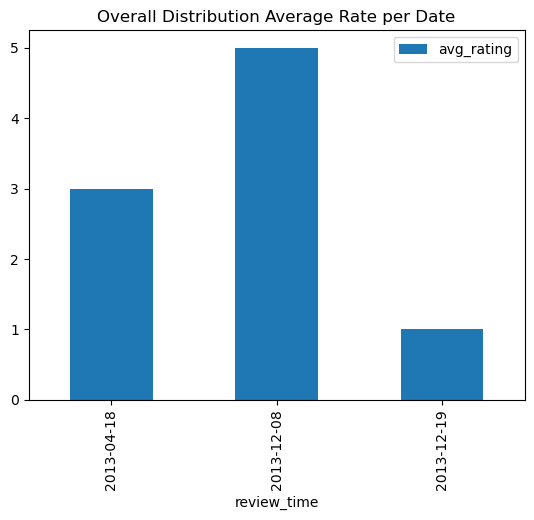

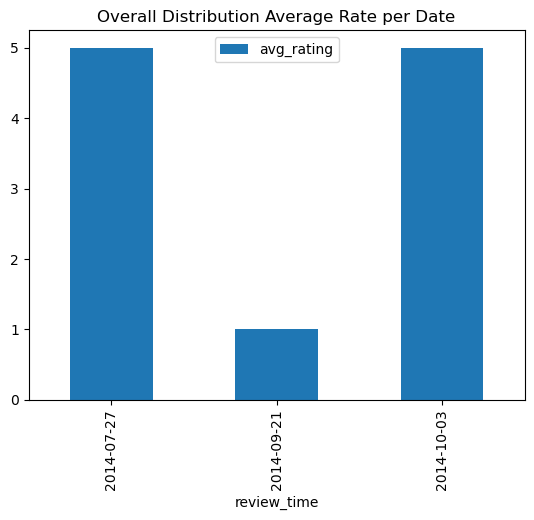

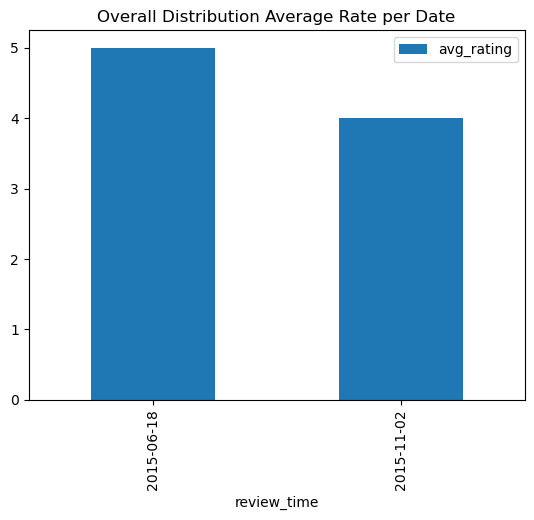

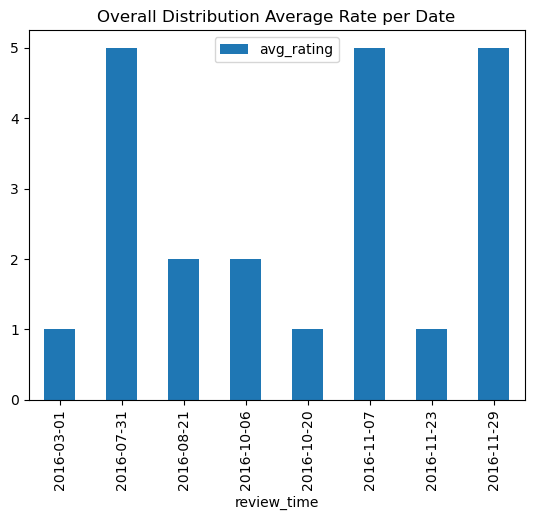

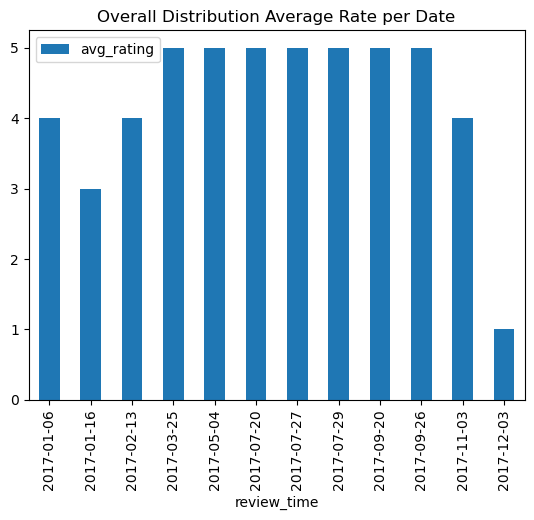

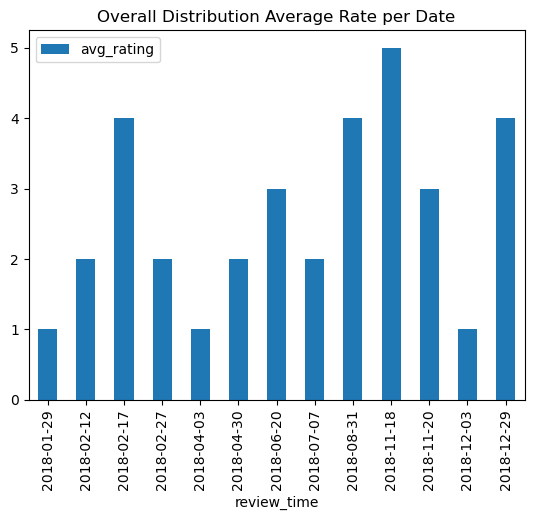

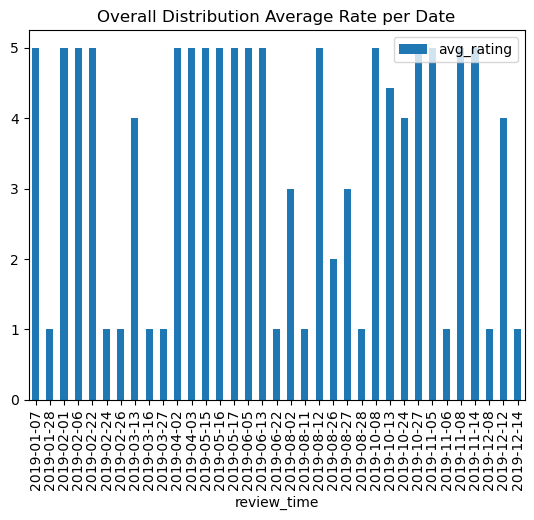

In [57]:
temp = df_trend.groupby('review_time').agg({'rating_sum': 'sum', 'rating_count': 'sum'})
temp['avg_rating'] = (temp['rating_sum'] / temp['rating_count']).fillna(0)

min_year = np.min(df_trend['review_time']).year
max_year = np.max(df_trend['review_time']).year

for year in range(min_year, max_year + 1):
    lower = pd.to_datetime(str(year) + "-01-01").date()
    upper = pd.to_datetime(str(year) + "-12-31").date()
    mask = (temp.index >= lower) & (temp.index <= upper)
    
    temp[mask].drop(['rating_sum', 'rating_count'], axis=1).plot(kind='bar', title="Overall Distribution Average Rate per Date")
    
plt.show()

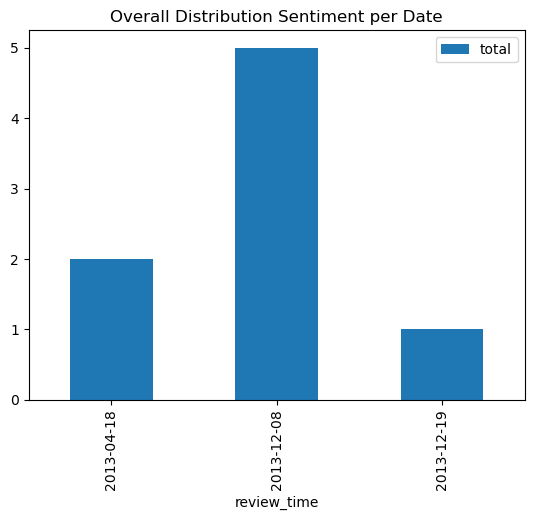

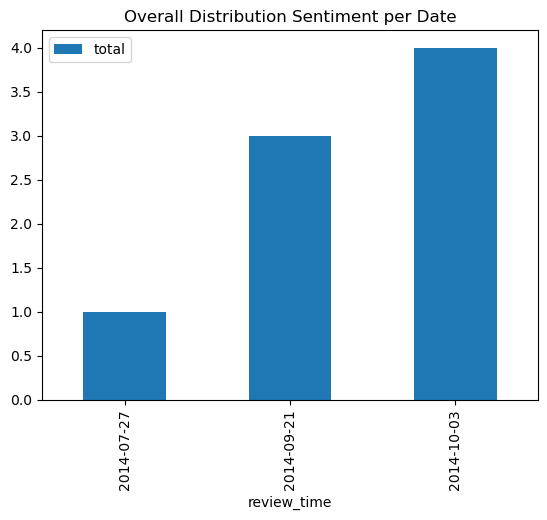

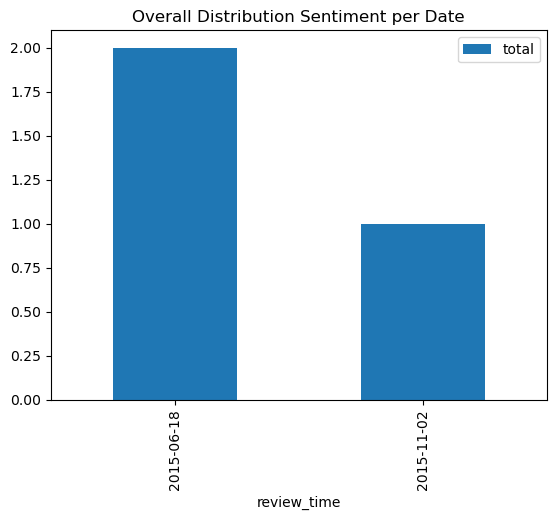

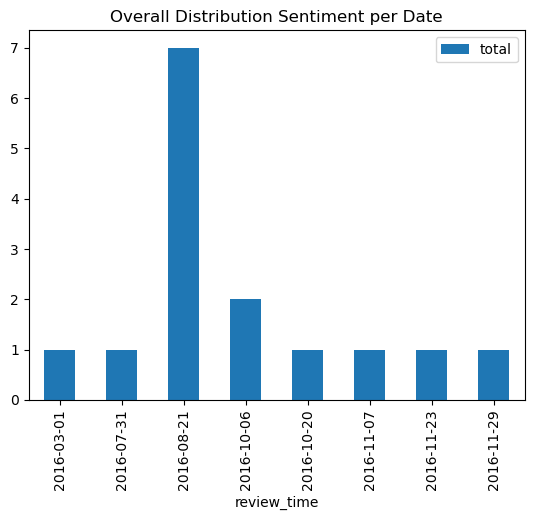

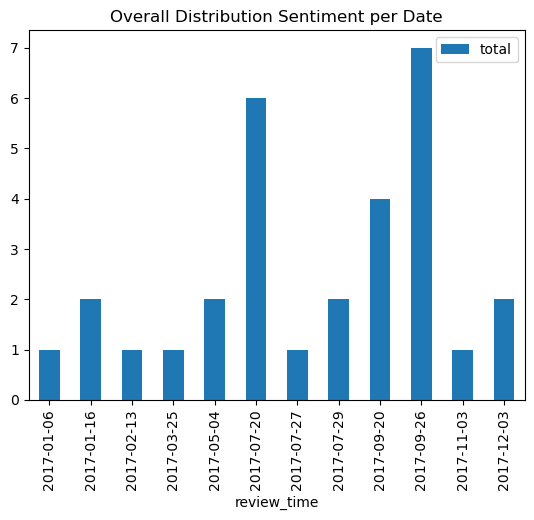

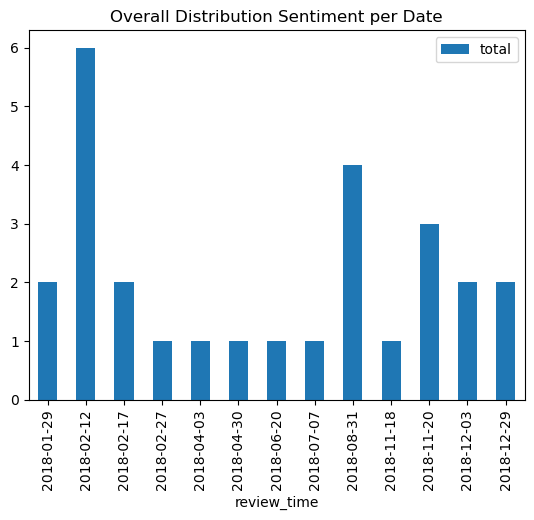

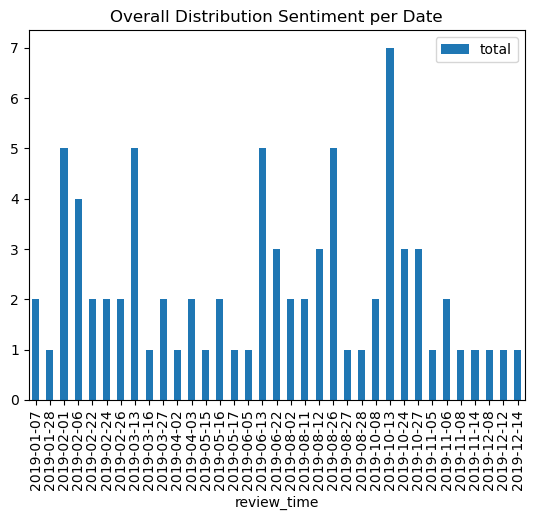

In [60]:
temp = df_trend.groupby('review_time').agg({'total':'sum'})

for year in range(min_year, max_year + 1):
    lower = pd.to_datetime(str(year) + "-01-01").date()
    upper = pd.to_datetime(str(year) + "-12-31").date()
    mask = (temp.index >= lower) & (temp.index <= upper)
    
    temp[mask].plot(kind='bar', title="Overall Distribution Sentiment per Date")
    plt.show()

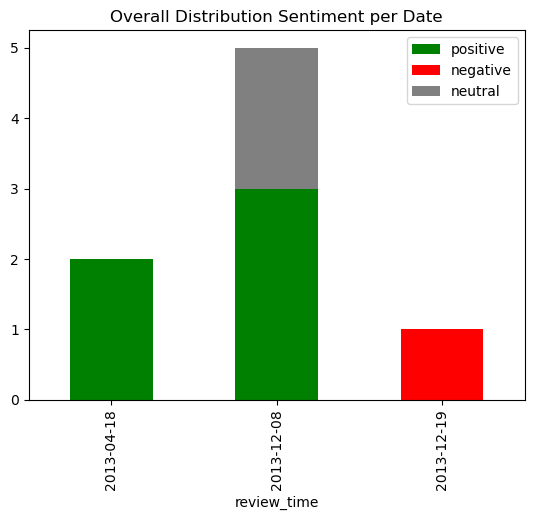

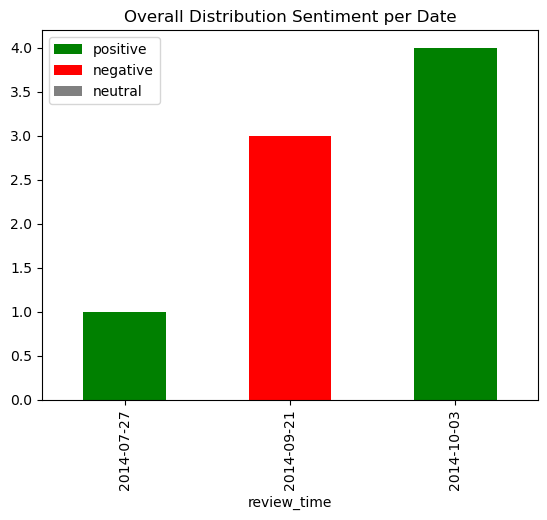

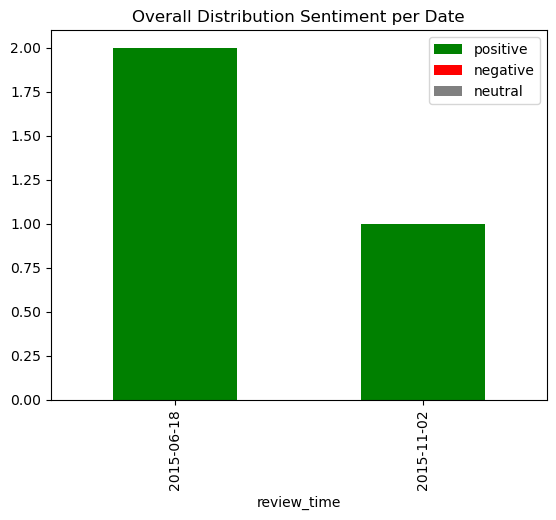

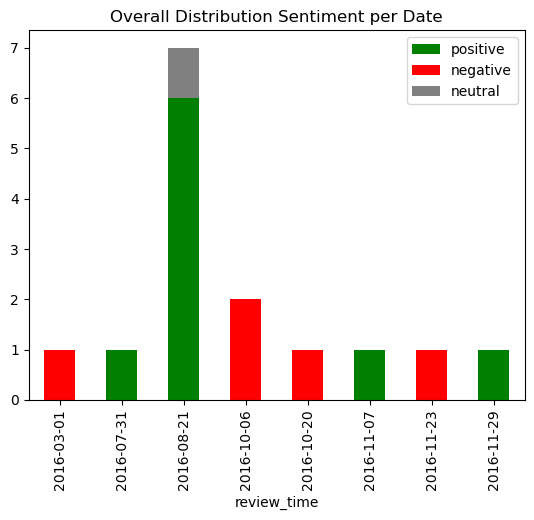

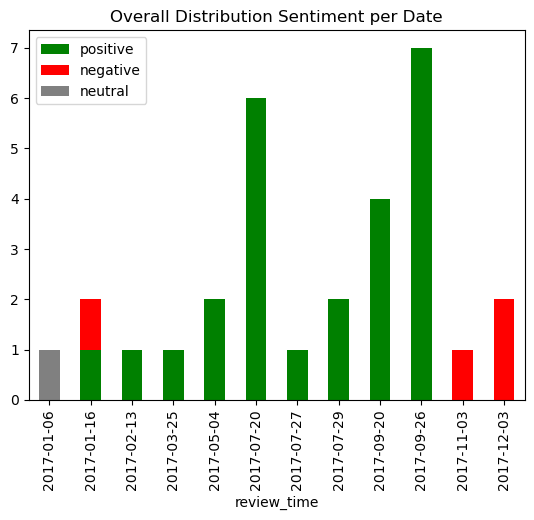

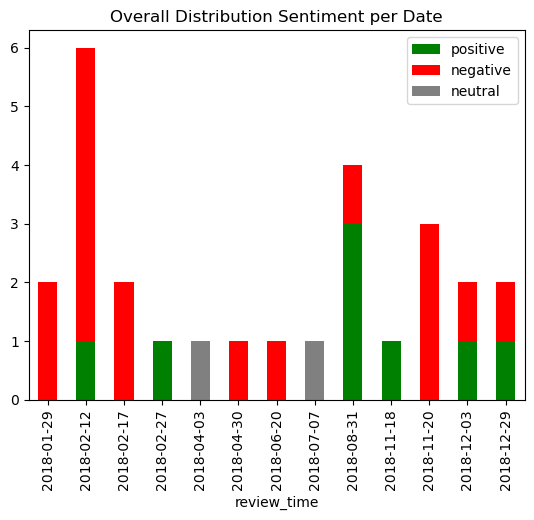

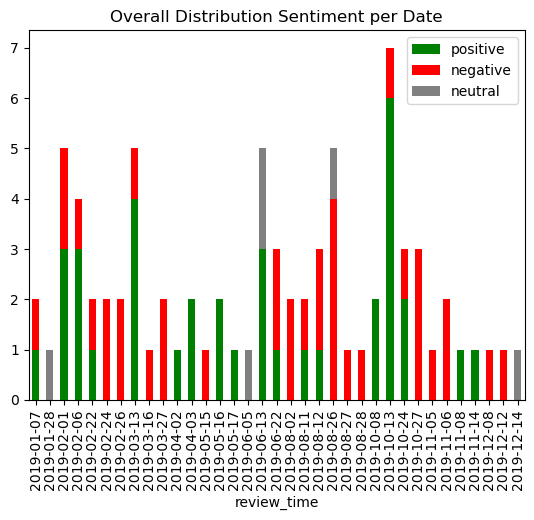

In [61]:
temp = df_trend\
        .groupby('review_time')\
        .agg({'positive':'sum', 
              'negative':'sum',
              'neutral': 'sum'})


for year in range(min_year, max_year + 1):
    lower = pd.to_datetime(str(year) + "-01-01").date()
    upper = pd.to_datetime(str(year) + "-12-31").date()
    mask = (temp.index >= lower) & (temp.index <= upper)
    
    temp[mask].plot(kind='bar', 
                    title="Overall Distribution Sentiment per Date",
                    stacked=True, 
                    color=['green', 'red', 'gray'])
    plt.show()


plt.show()

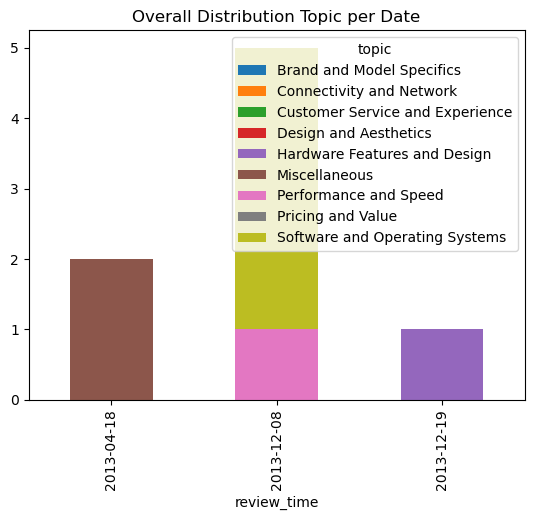

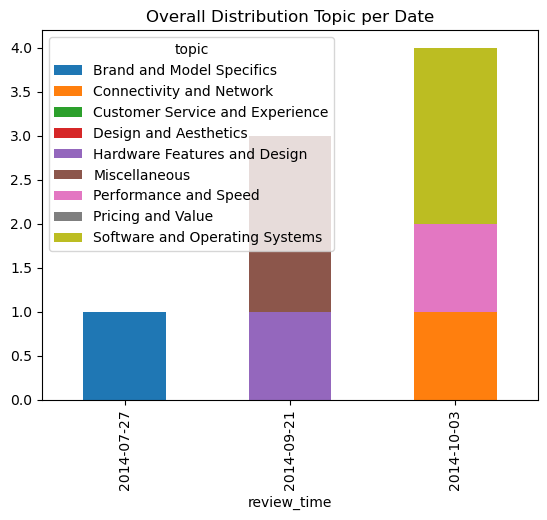

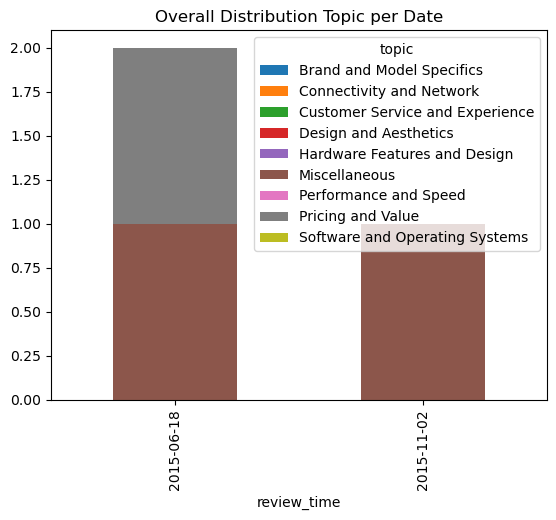

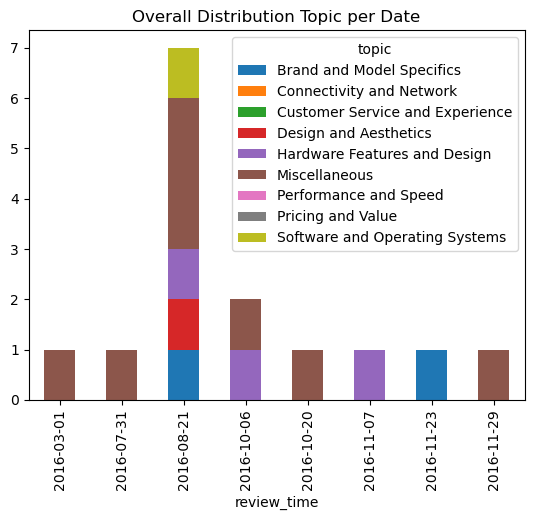

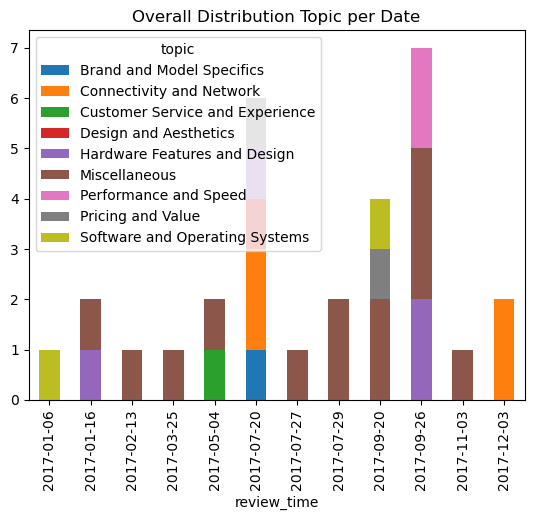

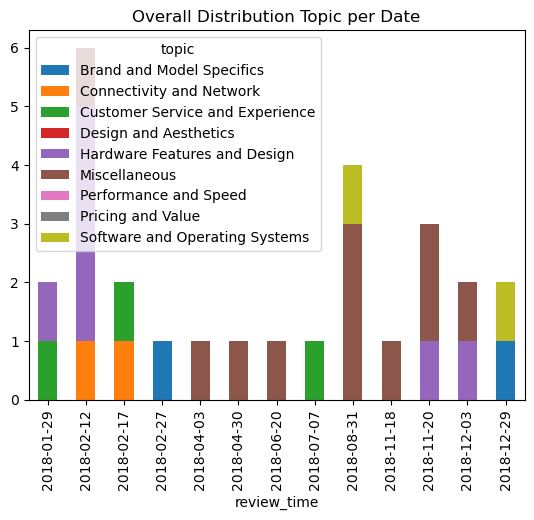

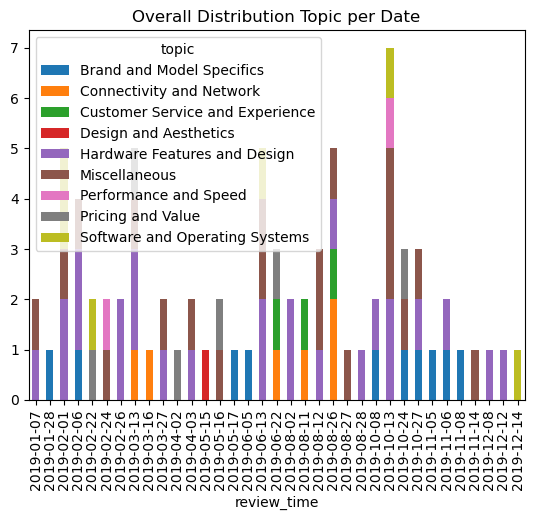

In [62]:
temp = df_trend\
    .groupby(['review_time', 'topic'])\
    .agg({'total': 'sum'})\
    .rename({'total': 'count'}, axis=1)\
    .reset_index()\
    .pivot(index='review_time', columns='topic', values='count')\
    .fillna(0)\


for year in range(min_year, max_year + 1):
    lower = pd.to_datetime(str(year) + "-01-01").date()
    upper = pd.to_datetime(str(year) + "-12-31").date()
    mask = (temp.index >= lower) & (temp.index <= upper)
    
    temp[mask].plot(kind='bar', stacked=True, title='Overall Distribution Topic per Date')
    plt.show()


plt.show()

**Table Aspects**

In [63]:
topics = generate_topics(class_aspects)

print(topics)

['Hardware Features and Design', 'Software and Operating Systems', 'Performance and Speed', 'Pricing and Value', 'Connectivity and Network', 'Customer Service and Experience', 'Brand and Model Specifics', 'Design and Aesthetics', 'Miscellaneous']


In [68]:
# VARIABLES
FROM_DATE = "2019-01-01"
TO_DATE = "2019-12-31"
TOPIC = "Hardware Features and Design"

MIN_DATE = np.min(df_trend['review_time'])
FROM_DATE = pd.to_datetime(MIN_DATE).date() if len(FROM_DATE) == 0 else pd.to_datetime(FROM_DATE).date()


MAX_DATE = np.max(df_trend['review_time'])
TO_DATE = pd.to_datetime(MIN_DATE).date() if len(TO_DATE) == 0 else pd.to_datetime(TO_DATE).date()

In [69]:
df_aspect['review_time'] = df_aspect['review_time'].apply(lambda x: pd.to_datetime(x).date())
df_aspect.head()

,topic,review_time,aspect,negative,neutral,positive,total
0,Miscellaneous,2013-04-18,phone,0,0,1,1
1,Miscellaneous,2013-04-18,I,0,0,1,1
2,Software and Operating Systems,2013-12-08,feature,0,2,0,2
3,Software and Operating Systems,2013-12-08,app,0,0,1,1
4,Software and Operating Systems,2013-12-08,android,0,0,1,1


FROM_DATE:  2019-01-01
TO_DATE:  2019-12-31


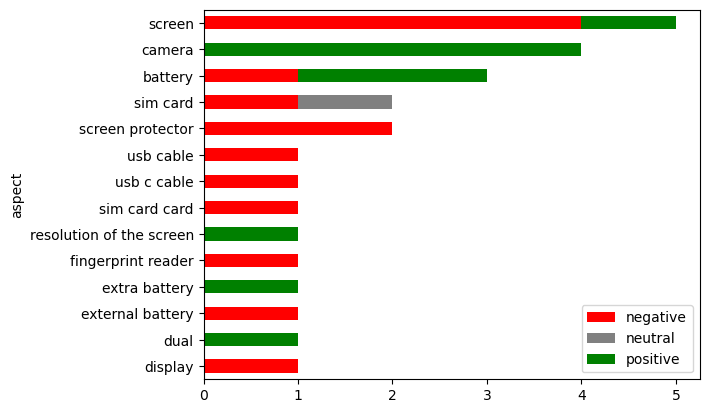

In [70]:
# Distribution per aspect

mask = (df_aspect['review_time'] >= FROM_DATE) & (df_aspect['review_time'] <= TO_DATE)
print("FROM_DATE: ", FROM_DATE)
print("TO_DATE: ", TO_DATE)

temp = df_aspect[mask].copy()
if TOPIC:
    mask = (temp['topic'] == TOPIC)
    temp = temp[mask].copy()
    
temp = temp.drop(['review_time', 'topic'], axis=1).groupby(['aspect']).sum().sort_values(by='total', ascending=True)

temp\
    .drop(['total'], axis=1)\
    .plot(kind='barh',
          stacked=True,
          color=['red', 'gray', 'green'])

plt.show()

**Table Main**

In [71]:
df_main['review_time'] = df_main['review_time'].apply(lambda x: pd.to_datetime(x).date())
df_main.head()

,review_id,review_time,review,rating,helpfulVotes,aspect_sentiment,topic
0,19,2013-12-19,Broke after one month.Piece of crap. worked fo...,1,4.0,● battery: negative,Hardware Features and Design
1,94,2014-09-21,Not happy that it was falsely advertised and w...,1,1.0,● quality: negative\n● window 8: negative\n● w...,Hardware Features and Design
2,30,2016-08-21,Mediocre at best. Design is not very attractiv...,2,1.0,● costs: neutral\n● note 7: positive\n● edge: ...,Hardware Features and Design
3,91,2016-10-06,"I got a bad phone, they don't have inventory s...",2,15.0,● mobile sim card: negative\n● t: negative,Hardware Features and Design
4,12,2016-10-20,Mobile not working.I am not able switch on my ...,1,4.0,● charging: negative,Hardware Features and Design


In [83]:
# VARIABLES

ASPECT = "screen"


pd.set_option('display.max_colwidth', 500)

In [79]:
def find_data(sent, term):
    pattern = r'\b' + re.escape(term) + r'\b'
    if re.search(pattern, sent, re.IGNORECASE):
        return True
    return False

In [84]:
mask = (df_main['review_time'] >= FROM_DATE) & (df_main['review_time'] <= TO_DATE)
print("FROM_DATE: ", FROM_DATE)
print("TO_DATE: ", TO_DATE)

temp = df_main[mask].copy()
if TOPIC:
    mask = (temp['topic'] == TOPIC)
    temp = temp[mask].copy()

if ASPECT:
    mask = (temp['aspect_sentiment'].apply(lambda x: find_data(x, term=ASPECT)))
    temp = temp[mask].copy()

temp = temp[['review', 'aspect_sentiment', 'rating']].sort_values(by='rating', ascending=False)
temp

FROM_DATE:  2019-01-01
TO_DATE:  2019-12-31


,review,aspect_sentiment,rating
13,"happy girl..i was so scared to order a $600 8 plus off amazon and after reading some of the reviews it made me a lil more scared. i just got my phone in the mail today and it came in a nice little assorted box with a charger and everything. i took the phone out it already had a screen protector on so that was a plus, i cut it on and activated it with no problem, and so far it’s working perfectly fine, just like new. so far so great :) thank you buyspry or however u spell it lol ❤️",● screen protector: negative\n● charger: positive,5
14,Switched from iPhone and absolutely loving it!!.This is an absolutely amazing phone! I exclusively used iPhone for the past 5 years and recently switched to the Huawei Mate 20 Pro after my iPhone screen cracked and ran out of memory space. I've been unimpressed by Apple's lack of innovation in recent years and decided to try the mate 20 Pro after doing a lot of research and reading a lot of reviews. This phone lives up to the hype and has exceeded all of my expectations! The camera is amazin...,● ios: positive\n● operating system: negative\n● resolution of the screen: positive\n● camera: positive\n● emui skin: negative,5
22,Good phone!.I personally think this phone is near perfect. Delivery was quick but not teleportation quick. The box came with - Galaxy A50 - Case - Sim tool - Quick charge American adapter and cable type c - low quality headphones I have used this phone for a while now and its really almost flagship level. For the price it's perfect. It will work 4g lte GSM for most providers in the States. I'll update if it works on Cricket. Performance great. UI great. Camera great. The security is great as...,● screen: negative\n● finger scanner: negative\n● security: positive,5
27,"Super fast and reliable.Amazing phone! I was skeptical as I've only ever had the Galaxy series of phones, but they've gotten so expensive that I had to make a change. I'm so glad I did. This phone has all the features I wanted from a Samsung and has nothing I don't need. I like the type of charger and the weight of the phone, I like the size of the screen and the speed of the fingerprint and facial recognition",● features: positive\n● facial: positive\n● speed: positive\n● screen: positive\n● size the: positive\n● charger: positive,5
21,"Pixel 3 has frequent display defects.I like this phone model. I bought this phone as a gift to my wife. Unfortunately, the phone turned out to be defective. There is a pink tint on the screen. Amazon does not want to properly help customers who are not in the USA. This is very sad.",● display: negative\n● screen: negative,3
18,"Arrived damaged.Phone arrived with a number of damages: a crack in the screen, the top right corner damaged and separating from the body, and dents and scrapes on all corners. Completely unacceptable ""refurbished"" condition.",● screen: negative\n● the: negative,1
26,Received used phone...The phone I received was used. It has a screen protector that it shouldn't and a scuff mark on the back from the previous owner case..,● screen protector: negative,1
30,"Only disappointment.Phone screen was in pretty rough shape when we got it. Expected much more but spent $200 on a new screen and then found out that the phone was warped. Not in the condition that it was promised, very disappointed. Will not buy from here again.",● screen: negative,1
